In [1]:
%pylab inline
import numpy as np
from matplotlib import pylab as plt
from sympy import*
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum import Dagger
init_printing(use_unicode=True)
from scipy.optimize import leastsq
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import argrelextrema
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from scipy import linalg
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [106]:
S0 = Matrix([[1,0],[0,1]])
S1 = Matrix([[0,1],[1,0]])
S2 = Matrix([[0,-1j],[1j,0]])
S3 = Matrix([[1,0],[0,-1]])

def dar_matriz_densidad(estadisticas):
    
    normz=estadisticas[0]+estadisticas[1]
    pz0=estadisticas[0]/normz
    pz1=estadisticas[1]/normz
    
    normx=estadisticas[2]+estadisticas[3]
    px0=estadisticas[2]/normx
    px1=estadisticas[3]/normx
    
    normy=estadisticas[4]+estadisticas[5]
    py0=estadisticas[4]/normy
    py1=estadisticas[5]/normy
    
    s0=pz0+pz1
    s1=px0-px1
    s2=py0-py1
    s3=pz0-pz1
    
    rho=0.5*(s0*S0+s1*S1+s2*S2+s3*S3)
    
    return (rho,[pz0,pz1,px0,px1,py0,py1],[s0,s1,s2,s3])

def dar_matriz_densidad_teorica(r,theta,phi):
    theta=deg2rad(2*(theta+22.5))
    phi=deg2rad(phi)
    
    alpha=cos(theta)
    betha=np.e**(1j*phi)*sin(theta)
    
    rho=Matrix([[alpha**2,alpha*np.conj(betha)],[np.conj(alpha)*betha,abs(betha)**2]])
    return (rho)

def dar_fidelidad(teorica,experimental):
    x=(np.matrix(teorica).astype(complex_))
    y=(np.matrix(experimental).astype(complex_))
    resp= (real(np.trace(linalg.sqrtm(dot(dot(linalg.sqrtm(x),y),linalg.sqrtm(x))))))**2
    return(round(resp,4))

def dar_pureza(experimental):
    x=(np.matrix(experimental).astype(complex_))
    resp=real(np.trace(dot(x,x)))
    return(round(float(resp),4))
    
def dar_real_matriz(matriz):
    parte_real=real(np.matrix(matriz).astype(complex_)).ravel()
    return (np.array(parte_real)[0])

def dar_imag_matriz(matriz):
    parte_im=imag(np.matrix(matriz).astype(complex_)).ravel()
    return(np.array(parte_im)[0])
    
    
def barPlot(z, ax):
    x = np.arange(2)
    y = np.arange(2)

    
    zmin = z.min()
    bottom = np.zeros(4)
    xx=[0.1, 1.1, 0.1, 1.1]
    yy=[0.1, 0.1, 1.1, 1.1]
    
    ax.bar3d(xx, yy, bottom, [0.8,0.8,0.8,0.8], [0.8,0.8,0.8,0.8], z, alpha = 1)

    ax.set_xticks(np.arange(min(x)+0.5, max(x)+1.5, 1.0))
    ax.set_yticks(np.arange(min(y)+0.5, max(y)+1.5, 1.0))
    ax.set_zticks([-1,-0.5,0,0.5,1])

    labelsX = [r"$\left|V\right\rangle$",r"$\left|H\right\rangle$"]
    labelsY = [r"$\left|V\right\rangle$",r"$\left|\right\rangle$"]

    ax.set_xticklabels(labelsX)
    ax.set_yticklabels(labelsY)
    ax.set_zticklabels([-1,-0.5,0,0.5,1])
    
    ax.tick_params(axis='both', labelsize=20)

    ax.set_zlim(min(zmin, 0), max(z.max(), 0))

    XX = np.arange(0, max(x)+2, 1)
    YY = np.arange(0, max(y)+2, 1)
    XX, YY = np.meshgrid(XX, YY)
    ZZ = np.zeros_like(XX)
    ax.plot_surface(XX, YY, ZZ,  linewidth=5, color = 'k', alpha = 0.1)
    fig.patch.set_facecolor('white')
    ax.set_axis_bgcolor('white')
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))


    plt.tight_layout()


    ax.set_zlim(-1, 1, 0)
    ax.view_init(30, 30)

    return ax


In [107]:
datos_polarizacion = np.loadtxt("DatosPol.csv", delimiter=",",skiprows=0)
norte=datos_polarizacion[:,0]
cancer=datos_polarizacion[:,1]
ecuador=datos_polarizacion[:,2]
capricornio=datos_polarizacion[:,3]
sur=datos_polarizacion[:,4]

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:738: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


[-0.018795550441120079, 0.17896274653031408, -0.87640346873573716]
\begin{table}[H]
\centering
\begin{tabular}{cccccc}
\toprule
\midrule
\multicolumn{6}{c}{\textbf{Prepared state parameters}}\\
\multicolumn{2}{c}{$\theta$}  & \multicolumn{2}{c}{$\phi$} &  \multicolumn{2}{c}{$r$}\\
\multicolumn{2}{c}{$0^o$}  & \multicolumn{2}{c}{$0^o$} &  \multicolumn{2}{c}{$1$}  \\
\midrule
\multicolumn{6}{c}{\textbf{Counts for the projection eigenstates}}\\
$\ket{H}$  &  $\ket{V}$&  $\ket{D}$ & $\ket{A}$ & $\ket{R}$ & $\ket{L}$\\
677.0&10278.0&5116.0&5312.0&6456.0&4496.0\\
\midrule
\multicolumn{6}{c}{\textbf{Purity and fidelity of the state}}\\
\multicolumn{3}{c}{Purity:}  & \multicolumn{3}{c}{Fidelity:}\\
\multicolumn{3}{c}{0.9002}&\multicolumn{3}{c}{0.9382}\\
\toprule
\bottomrule
\end{tabular}
\caption{Theta=1}
\label{tab:addlabel}
\end{table}


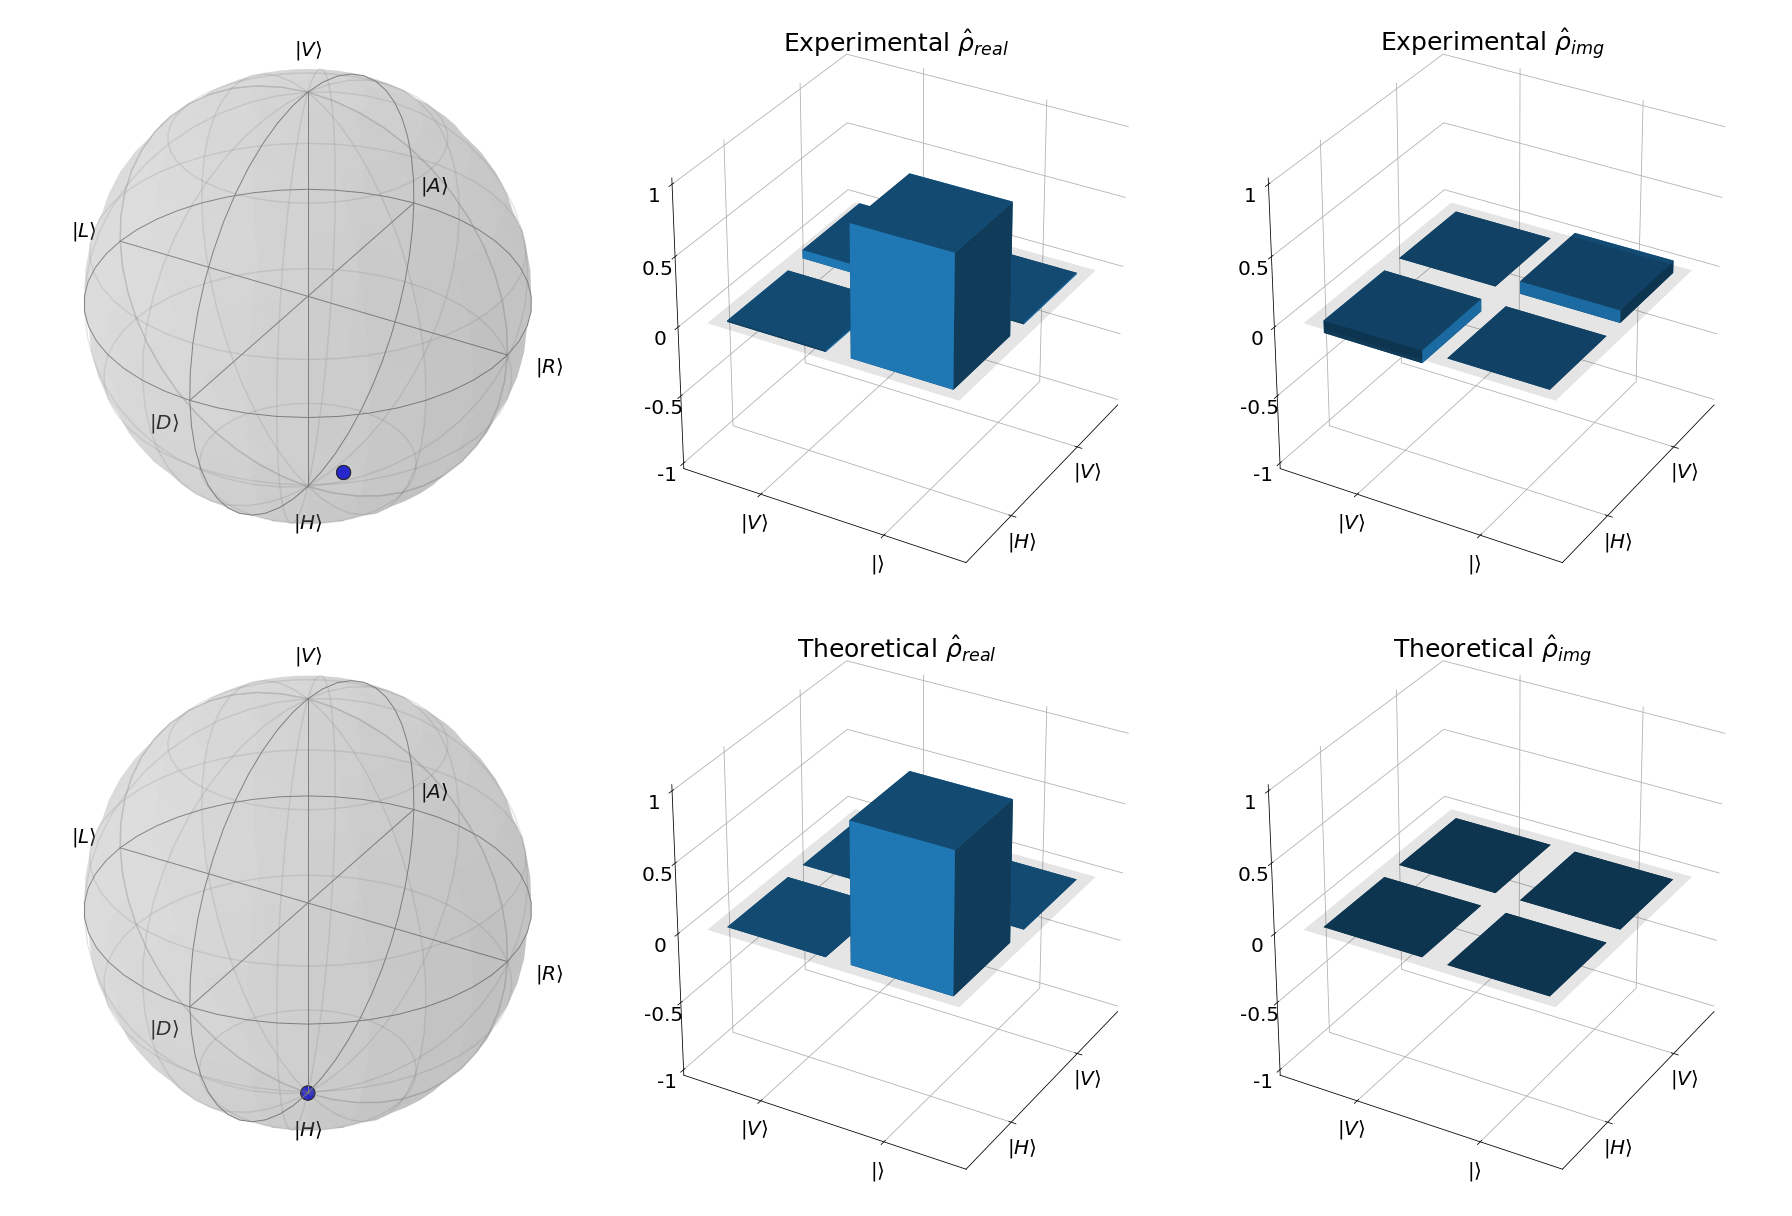

In [118]:
conteos=norte
rho,probabilidades,stokes=dar_matriz_densidad(conteos)

fig = plt.figure(figsize=(25, 17))
r,theta,phi =1,22.5,0

fid=str(round(dar_fidelidad(dar_matriz_densidad_teorica(r,theta,phi),rho),4))
pur=str(round(dar_pureza(rho),4))


ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(234,projection='3d')
ax3 = fig.add_subplot(232,projection='3d')
ax3.set_title('Experimental ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax4 = fig.add_subplot(235,projection='3d')
ax4.set_title('Theoretical ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax5 = fig.add_subplot(233,projection='3d')
ax5.set_title('Experimental ' + r'$\hat{\rho}_{img}$',fontsize=25)
ax6 = fig.add_subplot(236,projection='3d')
ax6.set_title('Theoretical ' + r'$\hat{\rho}_{img}$',fontsize=25)


z_real_exp=dar_real_matriz(rho)
z_real_teo=dar_real_matriz(dar_matriz_densidad_teorica(r,theta,phi))

z_imag_exp=dar_imag_matriz(rho)
z_imag_teo=dar_imag_matriz(dar_matriz_densidad_teorica(r,theta,phi))

x=np.linspace(0,1,100)
barPlot(z_real_exp,ax3)
barPlot(z_real_teo,ax4)
barPlot(z_imag_exp,ax5)
barPlot(z_imag_teo,ax6)

print(stokes[1:4])

b=Bloch(fig=fig,axes=ax1)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.add_points(stokes[1:4])
b.point_size=[200,200,200,200]
b.make_sphere()

b=Bloch(fig=fig,axes=ax2)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
theta=deg2rad(2*(2*theta+45))
phi=deg2rad(phi)
points=[round(sin(theta)*cos(phi)),round(sin(theta)*sin(phi)),round(cos(theta))]
b.add_points(points)
b.point_size=[200,200,200,200]
b.make_sphere()


print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{cccccc}')
print('\\toprule')
print('\\midrule')
print('\\multicolumn{6}{c}{\\textbf{Prepared state parameters}}\\\\')
print('\\multicolumn{2}{c}{$\\theta$}  & \\multicolumn{2}{c}{$\\phi$} &  \\multicolumn{2}{c}{$r$}\\\\')
print('\\multicolumn{2}{c}{$0^o$}  & \\multicolumn{2}{c}{$0^o$} &  \\multicolumn{2}{c}{$1$}  \\\\')
print('\\midrule')  
print('\\multicolumn{6}{c}{\\textbf{Counts for the projection eigenstates}}\\\\')
print('$\\ket{H}$  &  $\\ket{V}$&  $\\ket{D}$ & $\\ket{A}$ & $\\ket{R}$ & $\\ket{L}$\\\\')
print(str(round(conteos[0]))+'&'+str(round(conteos[1])) +'&'+str(round(conteos[2])) +'&'+str(round(conteos[3]))
      +'&'+str(round(conteos[4])) +'&'+str(round(conteos[5])) +'\\\\')
print('\midrule')
print('\\multicolumn{6}{c}{\\textbf{Purity and fidelity of the state}}\\\\')
print('\\multicolumn{3}{c}{Purity:}  & \\multicolumn{3}{c}{Fidelity:}\\\\')
print('\multicolumn{3}{c}'+'{'+str(pur)+'}'+ '&' +'\multicolumn{3}{c}'+'{'+str(fid)+'}\\\\')
print('\\toprule')  
print('\\bottomrule')
print('\\end{tabular}')
print('\\caption{Theta=1}')
print('\\label{tab:addlabel}')
print('\end{table}')


fig.savefig("tomA_pol.png")

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


[-0.40729737257450566, 0.61850302978578142, -0.55495603517186254]
\begin{table}[H]
\centering
\begin{tabular}{cccccc}
\toprule
\midrule
\multicolumn{6}{c}{\textbf{Prepared state parameters}}\\
\multicolumn{2}{c}{$\theta$}  & \multicolumn{2}{c}{$\phi$} &  \multicolumn{2}{c}{$r$}\\
\multicolumn{2}{c}{$0^o$}  & \multicolumn{2}{c}{$0^o$} &  \multicolumn{2}{c}{$1$}  \\
\midrule
\multicolumn{6}{c}{\textbf{Counts for the projection eigenstates}}\\
$\ket{H}$  &  $\ket{V}$&  $\ket{D}$ & $\ket{A}$ & $\ket{R}$ & $\ket{L}$\\
2227.0&7781.0&3192.0&7579.0&9482.0&2235.0\\
\midrule
\multicolumn{6}{c}{\textbf{Purity and fidelity of the state}}\\
\multicolumn{3}{c}{Purity:}  & \multicolumn{3}{c}{Fidelity:}\\
\multicolumn{3}{c}{0.9282}&\multicolumn{3}{c}{0.9527}\\
\toprule
\bottomrule
\end{tabular}
\caption{Theta=1}
\label{tab:addlabel}
\end{table}


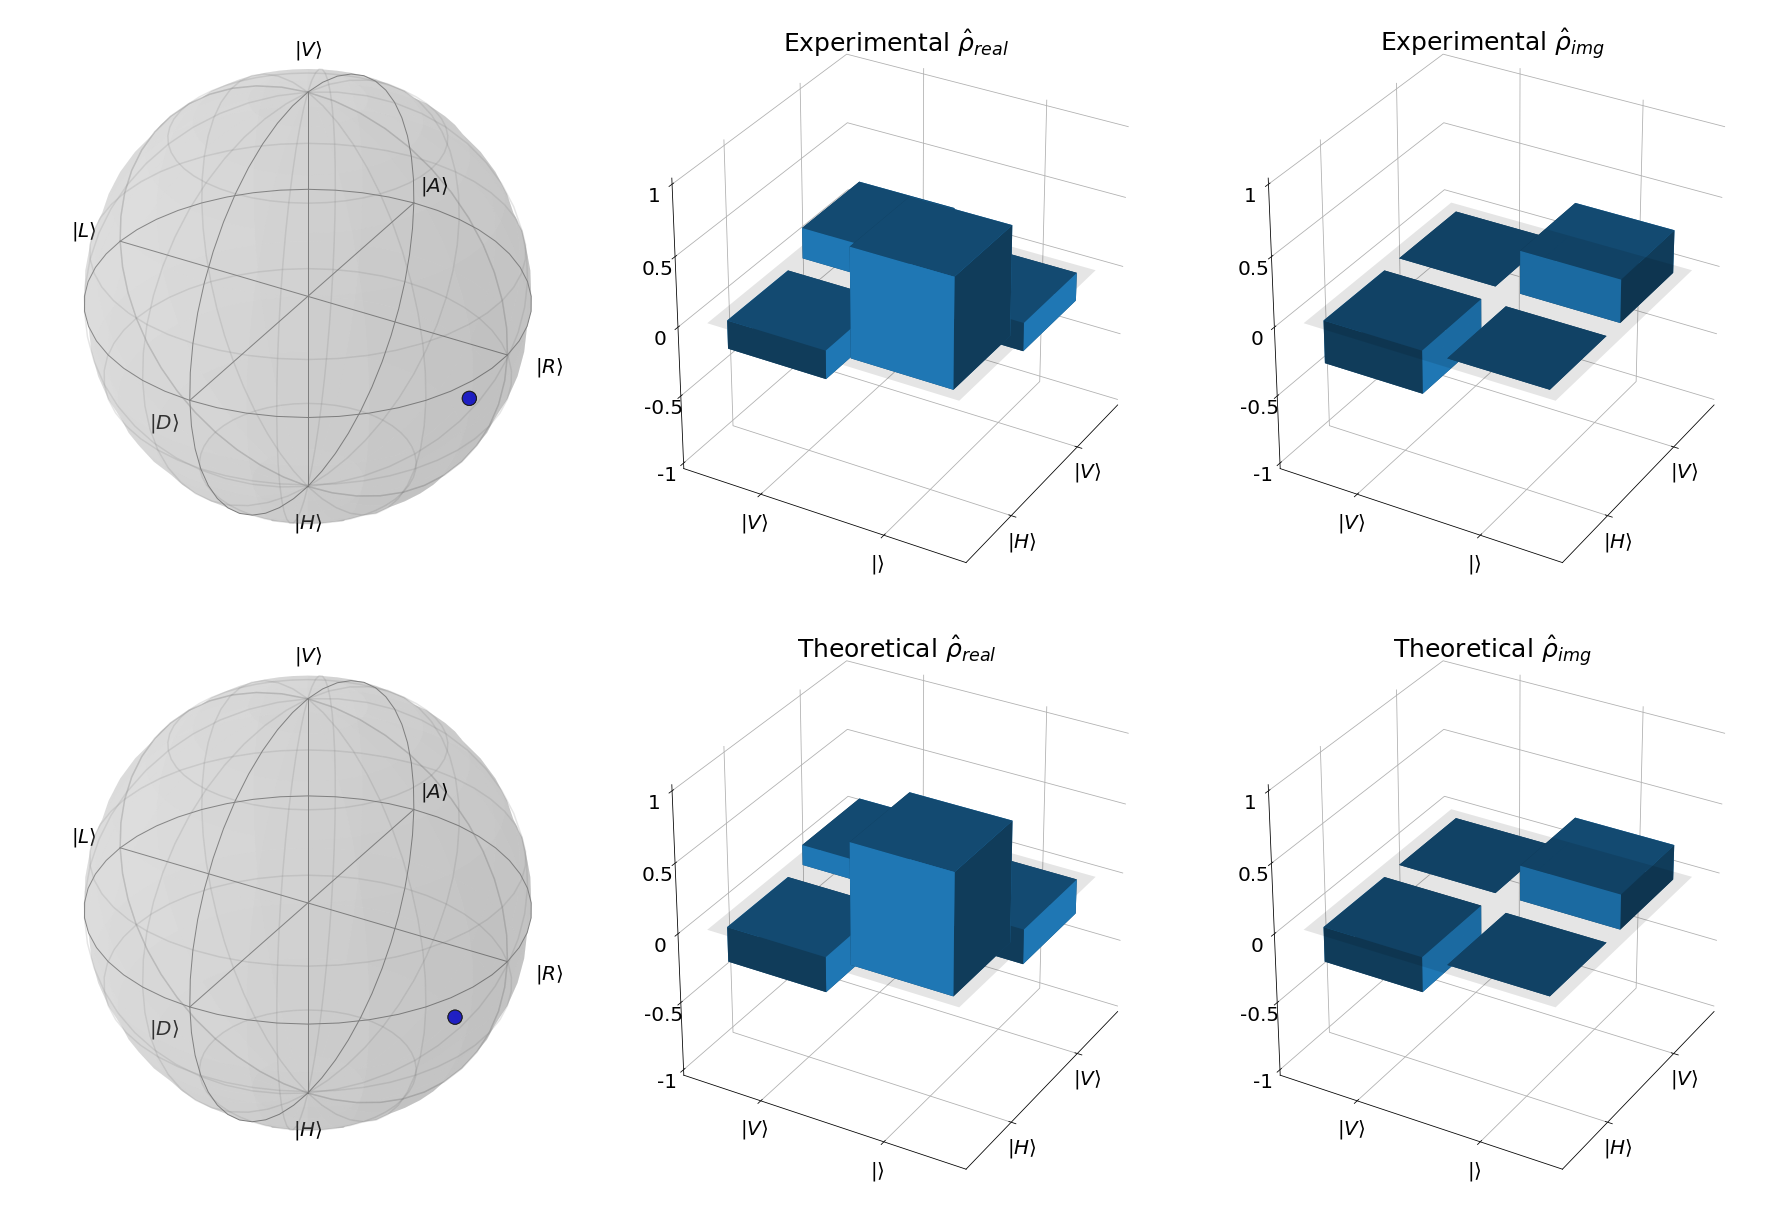

In [119]:
conteos=cancer
rho,probabilidades,stokes=dar_matriz_densidad(conteos)

fig = plt.figure(figsize=(25, 17))
r,theta,phi =1,11.25,-225

fid=str(round(dar_fidelidad(dar_matriz_densidad_teorica(r,theta,phi),rho),4))
pur=str(round(dar_pureza(rho),4))


ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(234,projection='3d')
ax3 = fig.add_subplot(232,projection='3d')
ax3.set_title('Experimental ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax4 = fig.add_subplot(235,projection='3d')
ax4.set_title('Theoretical ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax5 = fig.add_subplot(233,projection='3d')
ax5.set_title('Experimental ' + r'$\hat{\rho}_{img}$',fontsize=25)
ax6 = fig.add_subplot(236,projection='3d')
ax6.set_title('Theoretical ' + r'$\hat{\rho}_{img}$',fontsize=25)


z_real_exp=dar_real_matriz(rho)
z_real_teo=dar_real_matriz(dar_matriz_densidad_teorica(r,theta,phi))

z_imag_exp=dar_imag_matriz(rho)
z_imag_teo=dar_imag_matriz(dar_matriz_densidad_teorica(r,theta,phi))

x=np.linspace(0,1,100)
barPlot(z_real_exp,ax3)
barPlot(z_real_teo,ax4)
barPlot(z_imag_exp,ax5)
barPlot(z_imag_teo,ax6)

print(stokes[1:4])

b=Bloch(fig=fig,axes=ax1)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.add_points(stokes[1:4])
b.point_size=[200,200,200,200]
b.make_sphere()

b=Bloch(fig=fig,axes=ax2)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
theta=deg2rad(2*(2*theta+45))
phi=deg2rad(phi)
points=[round(sin(theta)*cos(phi),4),round(sin(theta)*sin(phi),4),round(cos(theta),4)]
b.add_points(points)
b.point_size=[200,200,200,200]
b.make_sphere()


print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{cccccc}')
print('\\toprule')
print('\\midrule')
print('\\multicolumn{6}{c}{\\textbf{Prepared state parameters}}\\\\')
print('\\multicolumn{2}{c}{$\\theta$}  & \\multicolumn{2}{c}{$\\phi$} &  \\multicolumn{2}{c}{$r$}\\\\')
print('\\multicolumn{2}{c}{$0^o$}  & \\multicolumn{2}{c}{$0^o$} &  \\multicolumn{2}{c}{$1$}  \\\\')
print('\\midrule')  
print('\\multicolumn{6}{c}{\\textbf{Counts for the projection eigenstates}}\\\\')
print('$\\ket{H}$  &  $\\ket{V}$&  $\\ket{D}$ & $\\ket{A}$ & $\\ket{R}$ & $\\ket{L}$\\\\')
print(str(round(conteos[0]))+'&'+str(round(conteos[1])) +'&'+str(round(conteos[2])) +'&'+str(round(conteos[3]))
      +'&'+str(round(conteos[4])) +'&'+str(round(conteos[5])) +'\\\\')
print('\midrule')
print('\\multicolumn{6}{c}{\\textbf{Purity and fidelity of the state}}\\\\')
print('\\multicolumn{3}{c}{Purity:}  & \\multicolumn{3}{c}{Fidelity:}\\\\')
print('\multicolumn{3}{c}'+'{'+str(pur)+'}'+ '&' +'\multicolumn{3}{c}'+'{'+str(fid)+'}\\\\')
print('\\toprule')  
print('\\bottomrule')
print('\\end{tabular}')
print('\\caption{Theta=1}')
print('\\label{tab:addlabel}')
print('\end{table}')

fig.savefig("tomB_pol.png")

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


[-0.4920834832673624, 0.76639047542434247, 0.075703744192402278]
\begin{table}[H]
\centering
\begin{tabular}{cccccc}
\toprule
\midrule
\multicolumn{6}{c}{\textbf{Prepared state parameters}}\\
\multicolumn{2}{c}{$\theta$}  & \multicolumn{2}{c}{$\phi$} &  \multicolumn{2}{c}{$r$}\\
\multicolumn{2}{c}{$0^o$}  & \multicolumn{2}{c}{$0^o$} &  \multicolumn{2}{c}{$1$}  \\
\midrule
\multicolumn{6}{c}{\textbf{Counts for the projection eigenstates}}\\
$\ket{H}$  &  $\ket{V}$&  $\ket{D}$ & $\ket{A}$ & $\ket{R}$ & $\ket{L}$\\
5904.0&5073.0&2823.0&8293.0&10979.0&1452.0\\
\midrule
\multicolumn{6}{c}{\textbf{Purity and fidelity of the state}}\\
\multicolumn{3}{c}{Purity:}  & \multicolumn{3}{c}{Fidelity:}\\
\multicolumn{3}{c}{0.9176}&\multicolumn{3}{c}{0.9449}\\
\toprule
\bottomrule
\end{tabular}
\caption{Theta=1}
\label{tab:addlabel}
\end{table}


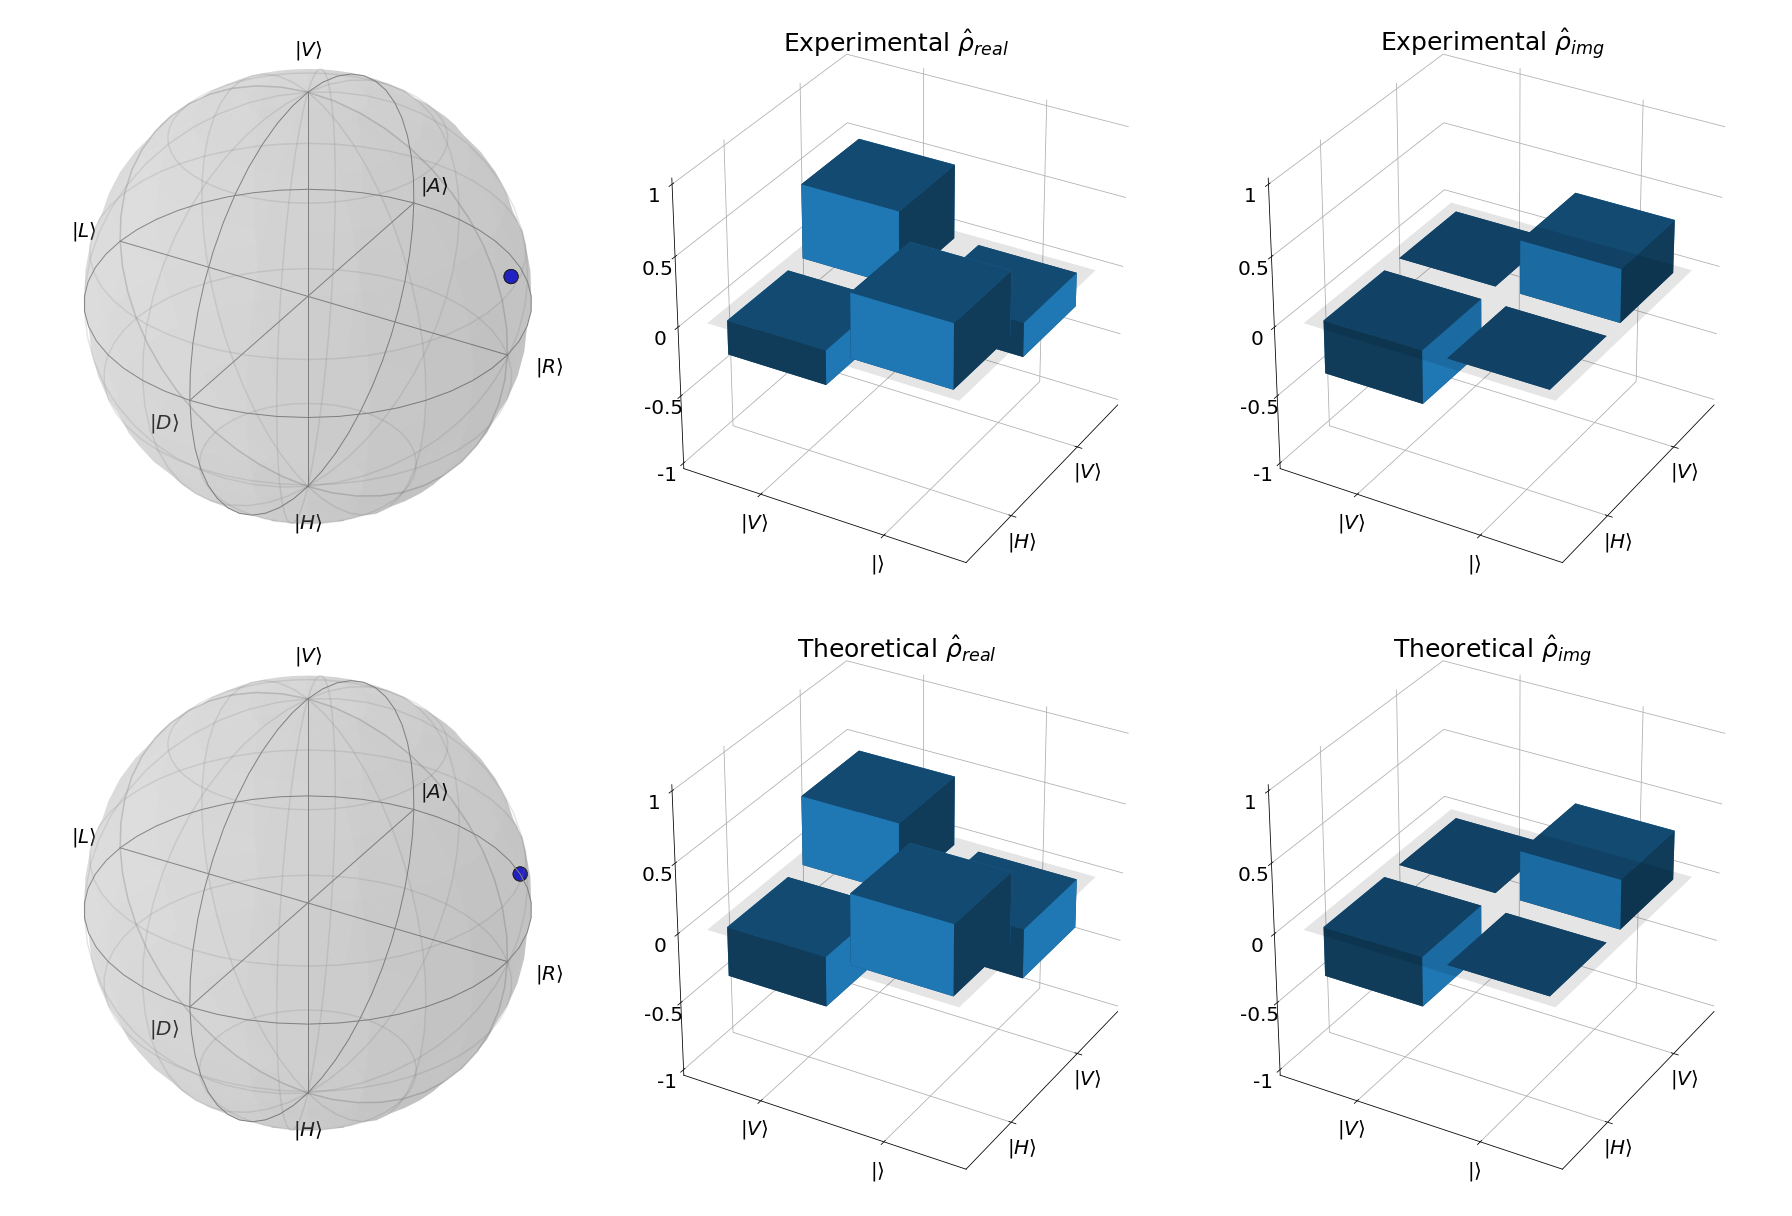

In [129]:
conteos=ecuador
rho,probabilidades,stokes=dar_matriz_densidad(conteos)

fig = plt.figure(figsize=(25, 17))
r,theta,phi =1,0,-(360-2*67.5)

fid=str(round(dar_fidelidad(dar_matriz_densidad_teorica(r,theta,phi),rho),4))
pur=str(round(dar_pureza(rho),4))


ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(234,projection='3d')
ax3 = fig.add_subplot(232,projection='3d')
ax3.set_title('Experimental ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax4 = fig.add_subplot(235,projection='3d')
ax4.set_title('Theoretical ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax5 = fig.add_subplot(233,projection='3d')
ax5.set_title('Experimental ' + r'$\hat{\rho}_{img}$',fontsize=25)
ax6 = fig.add_subplot(236,projection='3d')
ax6.set_title('Theoretical ' + r'$\hat{\rho}_{img}$',fontsize=25)


z_real_exp=dar_real_matriz(rho)
z_real_teo=dar_real_matriz(dar_matriz_densidad_teorica(r,theta,phi))

z_imag_exp=dar_imag_matriz(rho)
z_imag_teo=dar_imag_matriz(dar_matriz_densidad_teorica(r,theta,phi))

x=np.linspace(0,1,100)
barPlot(z_real_exp,ax3)
barPlot(z_real_teo,ax4)
barPlot(z_imag_exp,ax5)
barPlot(z_imag_teo,ax6)

print(stokes[1:4])

b=Bloch(fig=fig,axes=ax1)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.add_points(stokes[1:4])
b.point_size=[200,200,200,200]
b.make_sphere()

b=Bloch(fig=fig,axes=ax2)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
theta=deg2rad(2*(2*theta+45))
phi=deg2rad(phi)
points=[round(sin(theta)*cos(phi),4),round(sin(theta)*sin(phi),4),round(cos(theta),4)]
b.add_points(points)
b.point_size=[200,200,200,200]
b.make_sphere()


print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{cccccc}')
print('\\toprule')
print('\\midrule')
print('\\multicolumn{6}{c}{\\textbf{Prepared state parameters}}\\\\')
print('\\multicolumn{2}{c}{$\\theta$}  & \\multicolumn{2}{c}{$\\phi$} &  \\multicolumn{2}{c}{$r$}\\\\')
print('\\multicolumn{2}{c}{$0^o$}  & \\multicolumn{2}{c}{$0^o$} &  \\multicolumn{2}{c}{$1$}  \\\\')
print('\\midrule')  
print('\\multicolumn{6}{c}{\\textbf{Counts for the projection eigenstates}}\\\\')
print('$\\ket{H}$  &  $\\ket{V}$&  $\\ket{D}$ & $\\ket{A}$ & $\\ket{R}$ & $\\ket{L}$\\\\')
print(str(round(conteos[0]))+'&'+str(round(conteos[1])) +'&'+str(round(conteos[2])) +'&'+str(round(conteos[3]))
      +'&'+str(round(conteos[4])) +'&'+str(round(conteos[5])) +'\\\\')
print('\midrule')
print('\\multicolumn{6}{c}{\\textbf{Purity and fidelity of the state}}\\\\')
print('\\multicolumn{3}{c}{Purity:}  & \\multicolumn{3}{c}{Fidelity:}\\\\')
print('\multicolumn{3}{c}'+'{'+str(pur)+'}'+ '&' +'\multicolumn{3}{c}'+'{'+str(fid)+'}\\\\')
print('\\toprule')  
print('\\bottomrule')
print('\\end{tabular}')
print('\\caption{Theta=1}')
print('\\label{tab:addlabel}')
print('\end{table}')

fig.savefig("tomC_pol.png")

/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


[-0.26670632559984137, 0.58033573141486805, 0.65901891139483526]
\begin{table}[H]
\centering
\begin{tabular}{cccccc}
\toprule
\midrule
\multicolumn{6}{c}{\textbf{Prepared state parameters}}\\
\multicolumn{2}{c}{$\theta$}  & \multicolumn{2}{c}{$\phi$} &  \multicolumn{2}{c}{$r$}\\
\multicolumn{2}{c}{$0^o$}  & \multicolumn{2}{c}{$0^o$} &  \multicolumn{2}{c}{$1$}  \\
\midrule
\multicolumn{6}{c}{\textbf{Counts for the projection eigenstates}}\\
$\ket{H}$  &  $\ket{V}$&  $\ket{D}$ & $\ket{A}$ & $\ket{R}$ & $\ket{L}$\\
8641.0&1776.0&3698.0&6388.0&8567.0&2275.0\\
\midrule
\multicolumn{6}{c}{\textbf{Purity and fidelity of the state}}\\
\multicolumn{3}{c}{Purity:}  & \multicolumn{3}{c}{Fidelity:}\\
\multicolumn{3}{c}{0.9211}&\multicolumn{3}{c}{0.9586}\\
\toprule
\bottomrule
\end{tabular}
\caption{Theta=1}
\label{tab:addlabel}
\end{table}


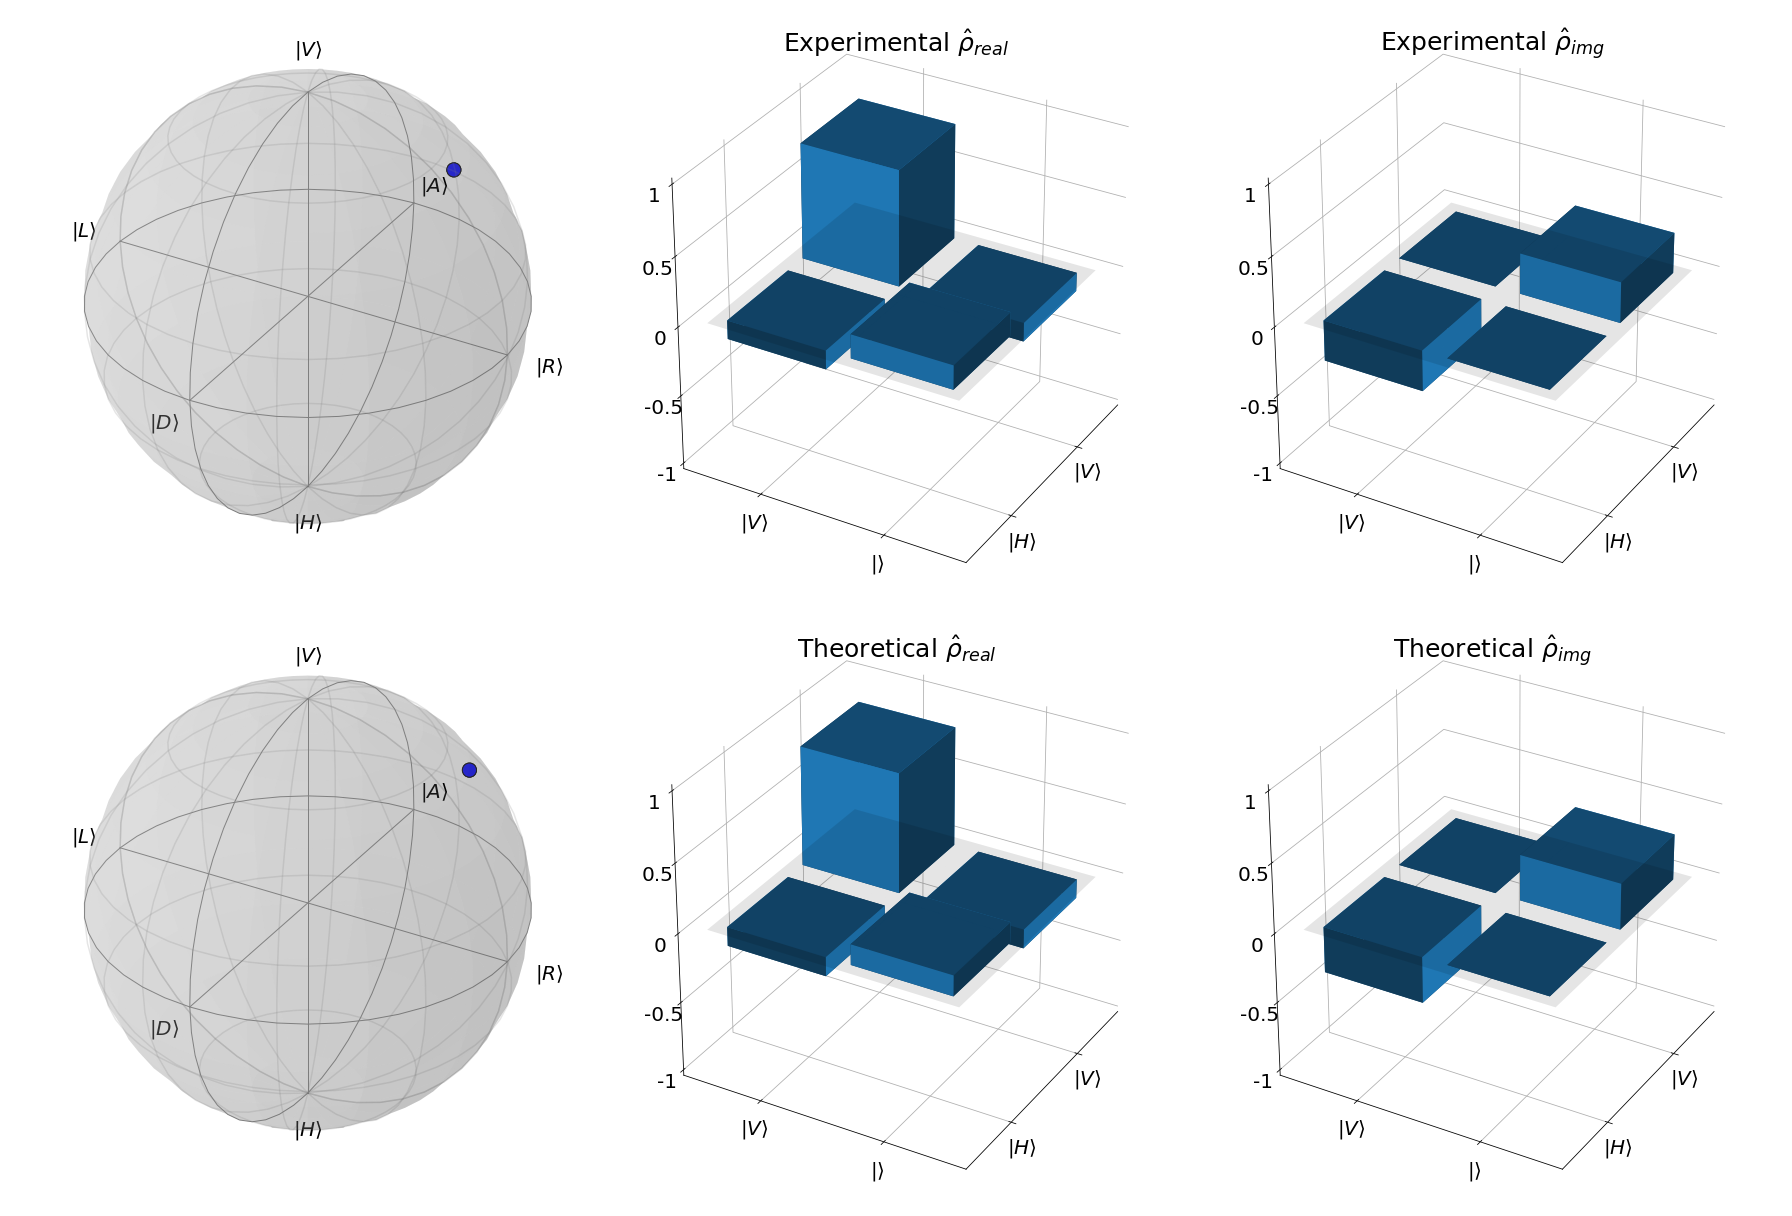

In [130]:
conteos=capricornio
rho,probabilidades,stokes=dar_matriz_densidad(conteos)

fig = plt.figure(figsize=(25, 17))
r,theta,phi =1,-11.25,180-67.5

fid=str(round(dar_fidelidad(dar_matriz_densidad_teorica(r,theta,phi),rho),4))
pur=str(round(dar_pureza(rho),4))


ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(234,projection='3d')
ax3 = fig.add_subplot(232,projection='3d')
ax3.set_title('Experimental ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax4 = fig.add_subplot(235,projection='3d')
ax4.set_title('Theoretical ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax5 = fig.add_subplot(233,projection='3d')
ax5.set_title('Experimental ' + r'$\hat{\rho}_{img}$',fontsize=25)
ax6 = fig.add_subplot(236,projection='3d')
ax6.set_title('Theoretical ' + r'$\hat{\rho}_{img}$',fontsize=25)


z_real_exp=dar_real_matriz(rho)
z_real_teo=dar_real_matriz(dar_matriz_densidad_teorica(r,theta,phi))

z_imag_exp=dar_imag_matriz(rho)
z_imag_teo=dar_imag_matriz(dar_matriz_densidad_teorica(r,theta,phi))

x=np.linspace(0,1,100)
barPlot(z_real_exp,ax3)
barPlot(z_real_teo,ax4)
barPlot(z_imag_exp,ax5)
barPlot(z_imag_teo,ax6)

print(stokes[1:4])

b=Bloch(fig=fig,axes=ax1)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.add_points(stokes[1:4])
b.point_size=[200,200,200,200]
b.make_sphere()

b=Bloch(fig=fig,axes=ax2)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
theta=deg2rad(2*(2*theta+45))
phi=deg2rad(phi)
points=[round(sin(theta)*cos(phi),4),round(sin(theta)*sin(phi),4),round(cos(theta),4)]
b.add_points(points)
b.point_size=[200,200,200,200]
b.make_sphere()


print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{cccccc}')
print('\\toprule')
print('\\midrule')
print('\\multicolumn{6}{c}{\\textbf{Prepared state parameters}}\\\\')
print('\\multicolumn{2}{c}{$\\theta$}  & \\multicolumn{2}{c}{$\\phi$} &  \\multicolumn{2}{c}{$r$}\\\\')
print('\\multicolumn{2}{c}{$0^o$}  & \\multicolumn{2}{c}{$0^o$} &  \\multicolumn{2}{c}{$1$}  \\\\')
print('\\midrule')  
print('\\multicolumn{6}{c}{\\textbf{Counts for the projection eigenstates}}\\\\')
print('$\\ket{H}$  &  $\\ket{V}$&  $\\ket{D}$ & $\\ket{A}$ & $\\ket{R}$ & $\\ket{L}$\\\\')
print(str(round(conteos[0]))+'&'+str(round(conteos[1])) +'&'+str(round(conteos[2])) +'&'+str(round(conteos[3]))
      +'&'+str(round(conteos[4])) +'&'+str(round(conteos[5])) +'\\\\')
print('\midrule')
print('\\multicolumn{6}{c}{\\textbf{Purity and fidelity of the state}}\\\\')
print('\\multicolumn{3}{c}{Purity:}  & \\multicolumn{3}{c}{Fidelity:}\\\\')
print('\multicolumn{3}{c}'+'{'+str(pur)+'}'+ '&' +'\multicolumn{3}{c}'+'{'+str(fid)+'}\\\\')
print('\\toprule')  
print('\\bottomrule')
print('\\end{tabular}')
print('\\caption{Theta=1}')
print('\\label{tab:addlabel}')
print('\end{table}')

savefig("tomD_pol.png")

Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.


/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/AlfredoRicci/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:738: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


[0.11479410269445856, 0.12015968063872257, 0.8617614269788183]
\begin{table}[H]
\centering
\begin{tabular}{cccccc}
\toprule
\midrule
\multicolumn{6}{c}{\textbf{Prepared state parameters}}\\
\multicolumn{2}{c}{$\theta$}  & \multicolumn{2}{c}{$\phi$} &  \multicolumn{2}{c}{$r$}\\
\multicolumn{2}{c}{$0^o$}  & \multicolumn{2}{c}{$0^o$} &  \multicolumn{2}{c}{$1$}  \\
\midrule
\multicolumn{6}{c}{\textbf{Counts for the projection eigenstates}}\\
$\ket{H}$  &  $\ket{V}$&  $\ket{D}$ & $\ket{A}$ & $\ket{R}$ & $\ket{L}$\\
9185.0&682.0&5482.0&4353.0&5612.0&4408.0\\
\midrule
\multicolumn{6}{c}{\textbf{Purity and fidelity of the state}}\\
\multicolumn{3}{c}{Purity:}  & \multicolumn{3}{c}{Fidelity:}\\
\multicolumn{3}{c}{0.8851}&\multicolumn{3}{c}{0.9309}\\
\toprule
\bottomrule
\end{tabular}
\caption{Theta=1}
\label{tab:addlabel}
\end{table}


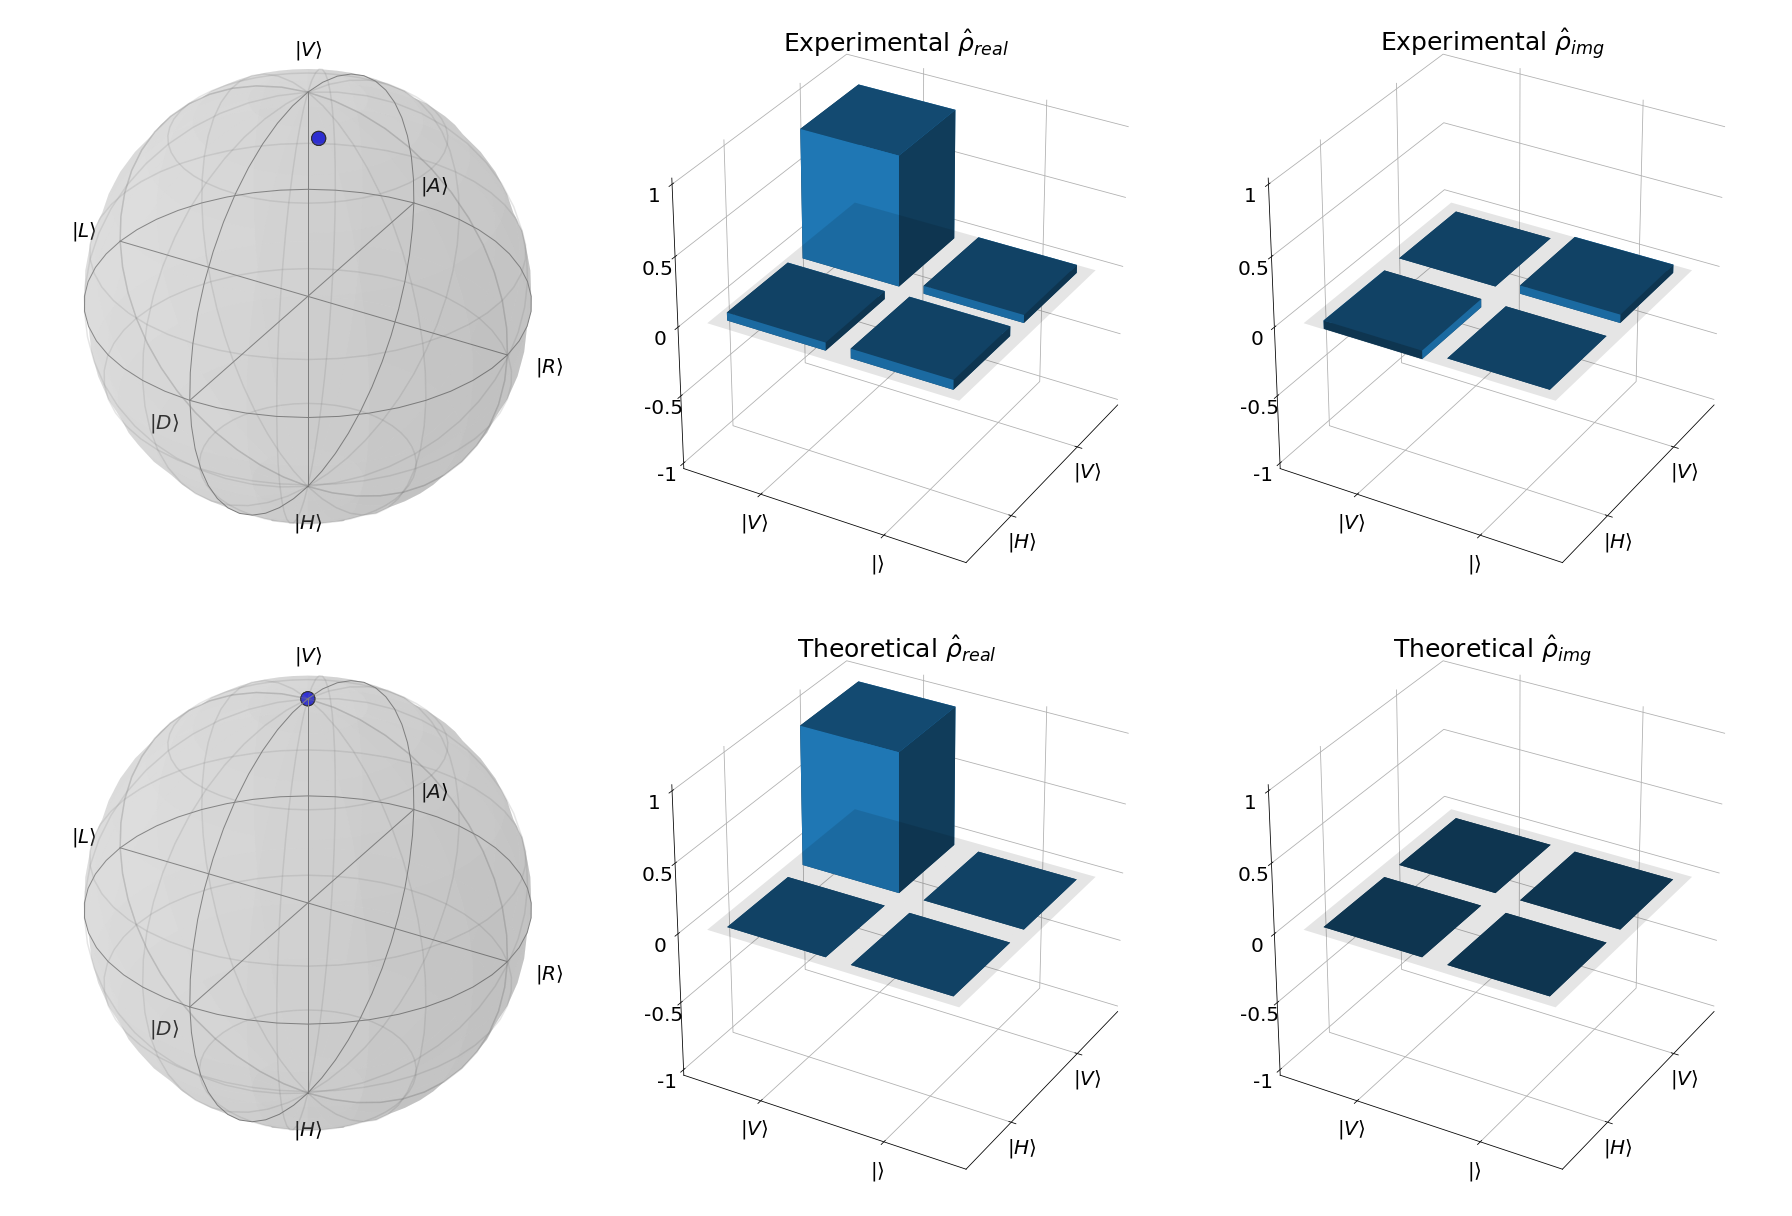

In [123]:
conteos=sur
rho,probabilidades,stokes=dar_matriz_densidad(conteos)

fig = plt.figure(figsize=(25, 17))
r,theta,phi =1,-22.5,0

fid=str(round(dar_fidelidad(dar_matriz_densidad_teorica(r,theta,phi),rho),4))
pur=str(round(dar_pureza(rho),4))


ax1 = fig.add_subplot(231,projection='3d')
ax2 = fig.add_subplot(234,projection='3d')
ax3 = fig.add_subplot(232,projection='3d')
ax3.set_title('Experimental ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax4 = fig.add_subplot(235,projection='3d')
ax4.set_title('Theoretical ' + r'$\hat{\rho}_{real}$',fontsize=25)
ax5 = fig.add_subplot(233,projection='3d')
ax5.set_title('Experimental ' + r'$\hat{\rho}_{img}$',fontsize=25)
ax6 = fig.add_subplot(236,projection='3d')
ax6.set_title('Theoretical ' + r'$\hat{\rho}_{img}$',fontsize=25)


z_real_exp=dar_real_matriz(rho)
z_real_teo=dar_real_matriz(dar_matriz_densidad_teorica(r,theta,phi))

z_imag_exp=dar_imag_matriz(rho)
z_imag_teo=dar_imag_matriz(dar_matriz_densidad_teorica(r,theta,phi))

x=np.linspace(0,1,100)
barPlot(z_real_exp,ax3)
barPlot(z_real_teo,ax4)
barPlot(z_imag_exp,ax5)
barPlot(z_imag_teo,ax6)

print(stokes[1:4])

b=Bloch(fig=fig,axes=ax1)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
b.add_points(stokes[1:4])
b.point_size=[200,200,200,200]
b.make_sphere()

b=Bloch(fig=fig,axes=ax2)
b.zlabel=[r'$\left|V\right>$', r'$\left|H\right>$']
b.ylabel=[r'$\left|R\right>$', r'$\left|L\right>$']
b.xlabel=[r'$\left|D\right>$', r'$\left|A\right>$']
b.frame_alpha=0.2
b.sphere_color='#A4A4A4'
theta=deg2rad(2*(2*theta+45))
phi=deg2rad(phi)
points=[round(sin(theta)*cos(phi),4),round(sin(theta)*sin(phi),4),round(cos(theta),4)]
b.add_points(points)
b.point_size=[200,200,200,200]
b.make_sphere()


print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{cccccc}')
print('\\toprule')
print('\\midrule')
print('\\multicolumn{6}{c}{\\textbf{Prepared state parameters}}\\\\')
print('\\multicolumn{2}{c}{$\\theta$}  & \\multicolumn{2}{c}{$\\phi$} &  \\multicolumn{2}{c}{$r$}\\\\')
print('\\multicolumn{2}{c}{$0^o$}  & \\multicolumn{2}{c}{$0^o$} &  \\multicolumn{2}{c}{$1$}  \\\\')
print('\\midrule')  
print('\\multicolumn{6}{c}{\\textbf{Counts for the projection eigenstates}}\\\\')
print('$\\ket{H}$  &  $\\ket{V}$&  $\\ket{D}$ & $\\ket{A}$ & $\\ket{R}$ & $\\ket{L}$\\\\')
print(str(round(conteos[0]))+'&'+str(round(conteos[1])) +'&'+str(round(conteos[2])) +'&'+str(round(conteos[3]))
      +'&'+str(round(conteos[4])) +'&'+str(round(conteos[5])) +'\\\\')
print('\midrule')
print('\\multicolumn{6}{c}{\\textbf{Purity and fidelity of the state}}\\\\')
print('\\multicolumn{3}{c}{Purity:}  & \\multicolumn{3}{c}{Fidelity:}\\\\')
print('\multicolumn{3}{c}'+'{'+str(pur)+'}'+ '&' +'\multicolumn{3}{c}'+'{'+str(fid)+'}\\\\')
print('\\toprule')  
print('\\bottomrule')
print('\\end{tabular}')
print('\\caption{Theta=1}')
print('\\label{tab:addlabel}')
print('\end{table}')

fig.savefig("tomE_pol.png")

In [113]:
45+22.5